In [1]:
# Simple Linear Regression on the Swedish Insurance Dataset
from random import seed
from random import randrange
from csv import reader
from math import sqrt

In [2]:
final_coeff = []

In [3]:
# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

In [4]:
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

In [5]:
# Split a dataset into a train and test set
def train_test_split(dataset, split):
	train = list()
	train_size = split * len(dataset)
	dataset_copy = list(dataset)
	while len(train) < train_size:
		index = randrange(len(dataset_copy))
		train.append(dataset_copy.pop(index))
	return train, dataset_copy

In [6]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)

In [7]:
# Evaluate an algorithm using a train/test split
def evaluate_algorithm(dataset, algorithm, split, *args):
	train, test = train_test_split(dataset, split)
	test_set = list()
	for row in test:
		row_copy = list(row)
		row_copy[-1] = None
		test_set.append(row_copy)
	predicted = algorithm(train, test_set, *args)
	actual = [row[-1] for row in test]
	rmse = rmse_metric(actual, predicted)
	return rmse

In [8]:
# Calculate the mean value of a list of numbers
def mean(values):
	return sum(values) / float(len(values))

In [9]:
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar

In [10]:
# Calculate the variance of a list of numbers
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])

In [11]:
# Calculate coefficients
def coefficients(dataset):
	x = [row[0] for row in dataset]
	y = [row[1] for row in dataset]
	x_mean, y_mean = mean(x), mean(y)
	b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b0 = y_mean - b1 * x_mean
	final_coeff.append(b0)
	final_coeff.append(b1)
	return [b0, b1]

In [12]:
# Simple linear regression algorithm
def simple_linear_regression(train, test):
	predictions = list()
	b0, b1 = coefficients(train)
	for row in test:
		yhat = b0 + b1 * row[0]
		predictions.append(yhat)
#		final_pred.append(yhat)
	return predictions

In [13]:
# Simple linear regression on insurance dataset
seed(1)
# load and prepare data
filename = "Insurance.csv"
dataset = load_csv(filename)
for i in range(len(dataset[0])):
	str_column_to_float(dataset, i)
# evaluate algorithm
split = 0.6
rmse = evaluate_algorithm(dataset, simple_linear_regression, split)
print('RMSE: %.3f' % (rmse))

RMSE: 33.630


In [14]:
from numpy import array
data = array(dataset)
final_pred=list()
for i in range(len(data)):
    final_pred.append(final_coeff[0]+final_coeff[1]*data[i,0])

In [15]:
print(len(final_pred))

63


Text(0, 0.5, 'total payment for all the claims \n in thousands of Swedish Kronor')

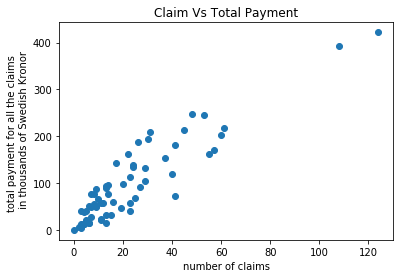

In [20]:
#!matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(data[:,0],data[:,1])
plt.title('Claim Vs Total Payment')
plt.xlabel('number of claims')
plt.ylabel('total payment for all the claims \n in thousands of Swedish Kronor')

Text(0, 0.5, 'total payment for all the claims \n in thousands of Swedish Kronor')

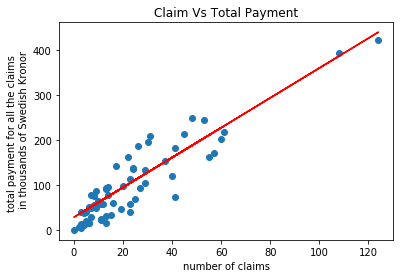

In [21]:
plt.scatter(data[:,0],data[:,1])
plt.plot(data[:,0],final_pred,color='red')
plt.title('Claim Vs Total Payment')
plt.xlabel('number of claims')
plt.ylabel('total payment for all the claims \n in thousands of Swedish Kronor')